In [96]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [97]:
df = pd.read_csv('final_clean_df.csv')

In [98]:
df

,Unnamed: 0,Property_type,Price,Building_condition,Number_of_frontages,Living_area,Bedrooms,Furnished,Swimming_pool,Garden_surface,...,code_9700,code_9900,K_Hyper equipped,K_Installed,K_Not installed,K_Semi equipped,K_USA hyper equipped,K_USA installed,K_USA semi equipped,K_USA uninstalled
0,1,0,399000.0,4.0,2.0,105.000000,2.0,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,499000.0,6.0,2.0,160.000000,3.0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,1495000.0,6.0,3.0,210.000000,4.0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,179000.0,4.0,2.0,63.000000,1.0,1,0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,255000.0,4.0,2.0,42.000000,1.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,12152,0,369000.0,6.0,2.0,55.000000,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
5569,12155,0,253515.0,4.0,2.0,68.000000,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
5570,12158,0,132000.0,6.0,2.0,239.288809,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
5571,12159,0,177000.0,6.0,2.0,239.288809,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


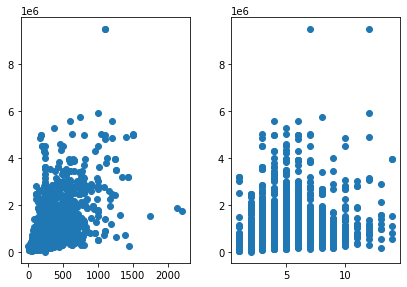

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.tight_layout()
axes[0].scatter(df['Living_area'],df['Price'])
axes[1].scatter(df['Bedrooms'],df['Price'])
plt.show()

In [100]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [101]:
#X = Pdummis.to_numpy().reshape(-1, 1)
X = df.drop(columns=['Price']).to_numpy()
Y = df.Price.to_numpy().reshape(-1, 1)
print('X shape:', X.shape)
print('Y shape:', Y.shape)


X shape: (5573, 124)
Y shape: (5573, 1)


In [123]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2)

print('X_train shape:', X_train.shape)
print('x_test shape:', x_test.shape)
print('Y_train shape:', Y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (4458, 124)
x_test shape: (1115, 124)
Y_train shape: (4458, 1)
y_test shape: (1115, 1)


In [124]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [125]:
reg.score(X_train, Y_train)

0.6625571582196566

In [126]:
reg.score(x_test, y_test)

0.5770228694710694

In [127]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

198069111115.21967

Text(0.5, 1.0, 'Price prediction Between 5M and 5k')

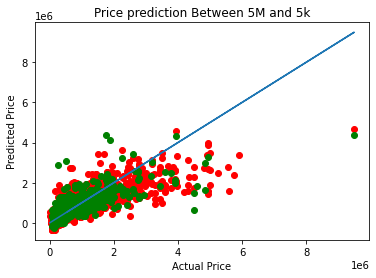

In [129]:
# Plotting the observed vs predicted values
import matplotlib.pyplot as plt
plt.scatter(Y_train, reg.predict(X_train), color = "red")
plt.scatter(y_test, reg.predict(x_test), c='green')
plt.plot(Y_train,Y_train )
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price prediction Between 5M and 5k')